<a href="https://colab.research.google.com/github/vsbca/Data-Science/blob/master/titanic/notebooks/Titanic_dataset_Initial_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/vsbca/Data-Science/master/titanic/data/raw/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.isnull().sum

<bound method DataFrame.sum of      PassengerId  Survived  Pclass   Name  ...  Ticket   Fare  Cabin  Embarked
0          False     False   False  False  ...   False  False   True     False
1          False     False   False  False  ...   False  False  False     False
2          False     False   False  False  ...   False  False   True     False
3          False     False   False  False  ...   False  False  False     False
4          False     False   False  False  ...   False  False   True     False
..           ...       ...     ...    ...  ...     ...    ...    ...       ...
886        False     False   False  False  ...   False  False   True     False
887        False     False   False  False  ...   False  False  False     False
888        False     False   False  False  ...   False  False   True     False
889        False     False   False  False  ...   False  False  False     False
890        False     False   False  False  ...   False  False   True     False

[891 rows x 12 colum

In [7]:
#Let's drop some not important column
#df = df.drop(['boat', 'body'], axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


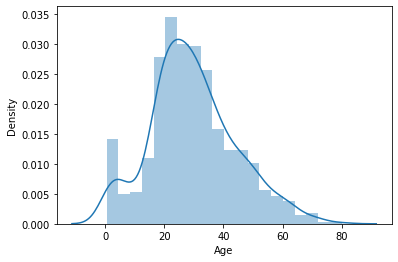

In [8]:
sns.distplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


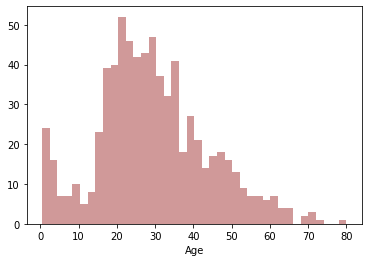

In [9]:
sns.distplot(df['Age'].dropna(), kde=False, color='darkred', bins=40)

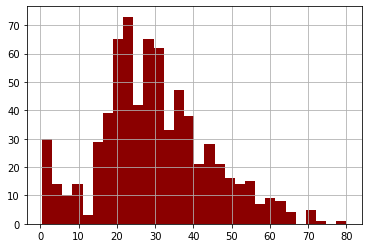

In [10]:
df['Age'].hist(bins=30, color='darkred')

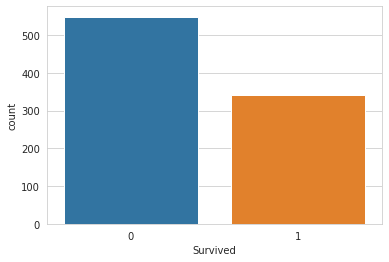

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df)

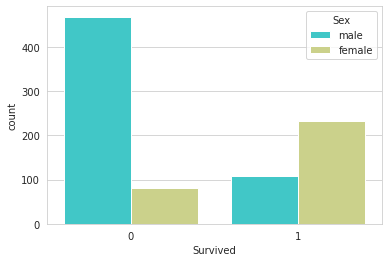

In [12]:
sns.set_style('whitegrid')
sns.countplot (x='Survived',hue='Sex',data=df,palette='rainbow')

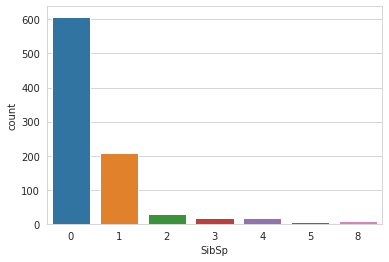

In [13]:
sns.countplot(x='SibSp',data=df)

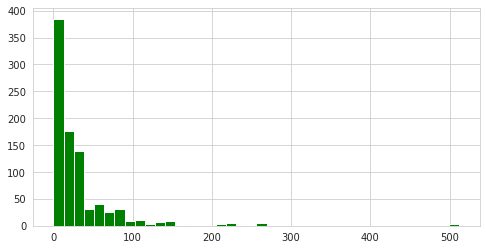

In [14]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

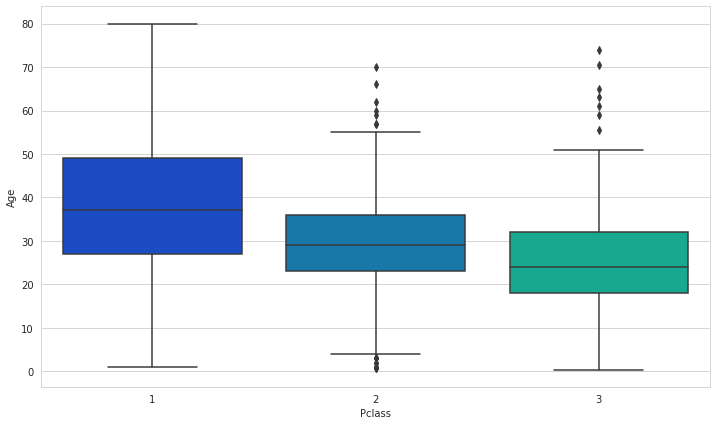

In [17]:
#Data Clean
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')

In [19]:
#new function to compute age
def infer_age(cols):
  age = cols[0]
  pclass = cols[1]
  if pd.isnull(age):
    #command
    if pclass == 1:
      return 37
    
    elif pclass == 2:
      return 29

    else:
      return age

In [20]:
df['Age'] = df[['Age', 'Pclass']].apply(infer_age, axis=1)

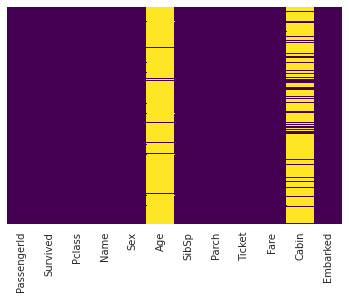

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
df.drop('Cabin', axis=1, inplace=True)

In [24]:
df = df.dropna()

In [34]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
17,18,1,2,29.0,0,0,13.0000
31,32,1,1,37.0,1,0,146.5208
55,56,1,1,37.0,0,0,35.5000
64,65,0,1,37.0,0,0,27.7208
166,167,1,1,37.0,0,1,55.0000


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
#
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'], test_size=0.30, random_state=101)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
predictions = logmodel.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
accuracy=confusion_matrix(y_test,predictions)

In [44]:
accuracy

array([[3, 4],
       [2, 4]])

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.5384615384615384